# Imports

In [1]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.AM import *
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

# Search for eigen frequences

## Dielectric

In [11]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 10*const.nano

mode_type = "TM"  # "TE" or "TM"

eps_out = 1
mu_out = 1

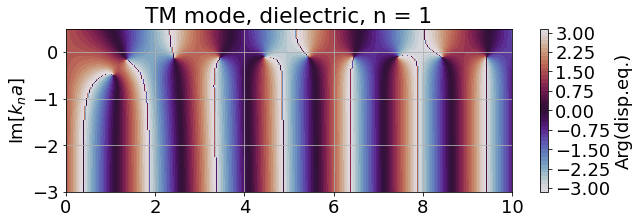

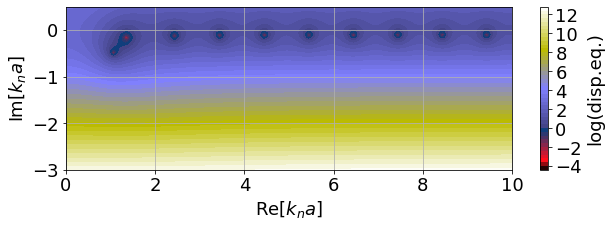

In [12]:
N = 300

z_re = np.linspace(0, 10, num=N)
z_im = np.linspace(-3, 0.5, num=N)

X, Y = np.meshgrid(z_re, z_im, sparse=True)

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

weightOrder = n
Z = foo_disp_nodiv(n, X + 1j*Y, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, ARG_Z, levels=50, cmap="twilight")
plt.colorbar(label="Arg(disp.eq.)")
plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=50, cmap="gist_stern")
plt.colorbar(label="log(disp.eq.)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

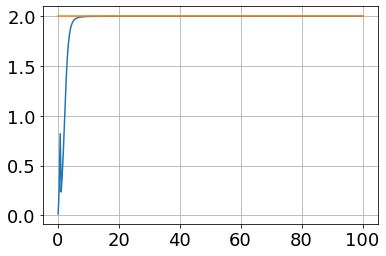

0.2591887334771263

In [2]:
qq = np.linspace(0.1, stop=100, num=300)

j = 3
m = 2

#omega = 9.39784431e-01-0.05135609j
omega = 1

n_index = np.sqrt(10) 

def den(q):
    zj = np.where(
        q <= 1,
        sp.spherical_jn(j, n_index*q*omega),
        spherical_h1(j, q*omega)
    )
    zjm1 = np.where(
        q <= 1,
        sp.spherical_jn(j-1, n_index*q*omega),
        spherical_h1(j-1, q*omega)
    )
    zjp1 = np.where(
        q <= 1,
        sp.spherical_jn(j+1, n_index*q*omega),
        spherical_h1(j+1, q*omega)
    )
    
    return np.abs(zj)**2 + (j+1)/(2*j+1) * np.abs(zjm1)**2 + j/(2*j+1) * np.abs(zjp1)**2


def num(q):
    zj = np.where(
        q <= 1,
        sp.spherical_jn(j, n_index*q*omega),
        spherical_h1(j, q*omega)
    )
    return 2*np.abs(zj)**2 * m

#plt.plot(qq, den(qq), label='w')
#plt.plot(qq, num(qq), label='Jz')
plt.plot(qq, num(qq)/den(qq))
plt.plot(qq, m * qq/qq)
#plt.legend()
plt.grid()
plt.show()


def get_int_val(omega, qmax=100):
    ranges = [[0, qmax]]

    int_den = integrate.nquad(
        lambda q: den(q*omega), 
        ranges,
        opts={'epsrel':1e-8}    
    )[0] 
    int_num = integrate.nquad(
        lambda q: num(q*omega), 
        ranges,
        opts={'epsrel':1e-8}    
    )[0] 
    return int_num / int_den 
    
    
get_int_val(omega)

In [3]:
def get_int_val(m, j, k0, n_index=10, rmax=100):
    def num(r):
        zj = np.where(
            r <= 1,
            sp.spherical_jn(j, n_index*r*k0),
            spherical_h1(j, r*k0)
        )
        return 2*np.abs(zj)**2 * m
    
    def den(r):
        zj = np.where(
            r <= 1,
            sp.spherical_jn(j, n_index*r*k0),
            spherical_h1(j, r*k0)
        )
        zjm1 = np.where(
            r <= 1,
            sp.spherical_jn(j-1, n_index*r*k0),
            spherical_h1(j-1, r*k0)
        )
        zjp1 = np.where(
            r <= 1,
            sp.spherical_jn(j+1, n_index*r*k0),
            spherical_h1(j+1, r*k0)
        )
        return np.abs(zj)**2 + (j+1)/(2*j+1) * np.abs(zjm1)**2 + j/(2*j+1) * np.abs(zjp1)**2
    
    ranges = [[0, rmax]]
    int_den = integrate.nquad(
        lambda r: r**2 * den(r), 
        ranges,
        opts={'epsrel':1e-8}    
    )[0] 
    int_num = integrate.nquad(
        lambda r: r**2 * num(r),
        ranges,
        opts={'epsrel':1e-8}    
    )[0] 
    return int_num / int_den 

get_int_val(m, j, 4, rmax=1000)

1.9999441382081355

In [120]:
m, j = 2, 2

kk = np.linspace(0.01, stop=5, num=80) 

jz = []

for k0 in kk:
    jz.append(get_int_val(m, j, k0, n_index=np.sqrt(10)))

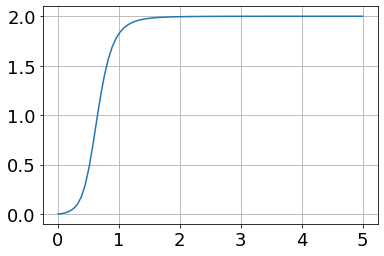

In [121]:
plt.plot(kk, jz)
plt.grid()
plt.show()

In [146]:
m, j = 2, 3

k0 = 2 - 0.1j

rrmax = 10 ** (np.linspace(1, stop=5, num=80))

jz = []

for rmax in rrmax:
    jz.append(get_int_val(m, j, k0, n_index=np.sqrt(10), rmax=rmax))


<ipython-input-124-11e97f480058>:26: RuntimeWarning: overflow encountered in double_scalars
  return np.abs(zj)**2 + (j+1)/(2*j+1) * np.abs(zjm1)**2 + j/(2*j+1) * np.abs(zjp1)**2
<ipython-input-124-11e97f480058>:30: RuntimeWarning: overflow encountered in double_scalars
  lambda r: r**2 * den(r),
/usr/lib64/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
<ipython-input-124-11e97f480058>:8: RuntimeWarning: overflow encountered in double_scalars
  return 2*np.abs(zj)**2 * m
<ipython-input-124-11e97f480058>:35: RuntimeWarning: overflow encountered in double_scalars
  lambda r: r**2 * num(r),


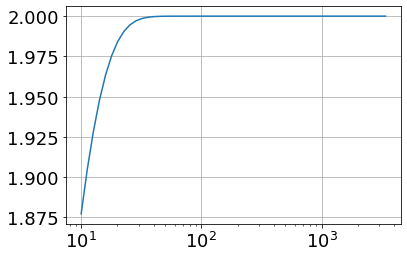

In [147]:
plt.plot(rrmax, jz)
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()